In [1]:
## importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
## loading the dataset
df=pd.read_excel('service-data.xlsx')

In [5]:
df.head()
## DOing forecasting for 3 products which had huge demand as per data shared
## engine oil,air filter,3m oil

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [3]:
## renaming the columns
df.rename({'Invoice Date':'Invoice_Date','Job Card Date':'Job_Card_Date',
           'Business Partner Name':'Business_Partner_Name',
           'Vehicle No.':'Vehicle_No','Vehicle Model':'Vehicle_Model',
           'Current KM Reading':'Current_KM_Reading','INVOICE LINE TEXT':'INVOICE_LINE_TEXT'},inplace=True,axis=1)

In [4]:
## creating dataset for engine oil

df_engine=df.loc[df['INVOICE_LINE_TEXT']=='ENGINE OIL']

In [5]:
## creating timeseries dataset for engine oil
engine_ts=df_engine[['Job_Card_Date','INVOICE_LINE_TEXT']]

In [6]:
ts1=pd.DataFrame(engine_ts.groupby(by=['Job_Card_Date'])['INVOICE_LINE_TEXT'].count())

In [7]:
## renaming invoice line text column.
ts1.rename(columns={'INVOICE_LINE_TEXT':'sales_engineoil'},inplace=True)

In [8]:
## resampling the timeseries data
monthly=ts1.resample('M').sum()

In [9]:
ts1=monthly

In [12]:
## checking mean and variance of series
##monthly.mean() ## 6.790
ts1.var() ## 1.193
##  the series is not a white noise.

sales_engineoil    3458.947619
dtype: float64

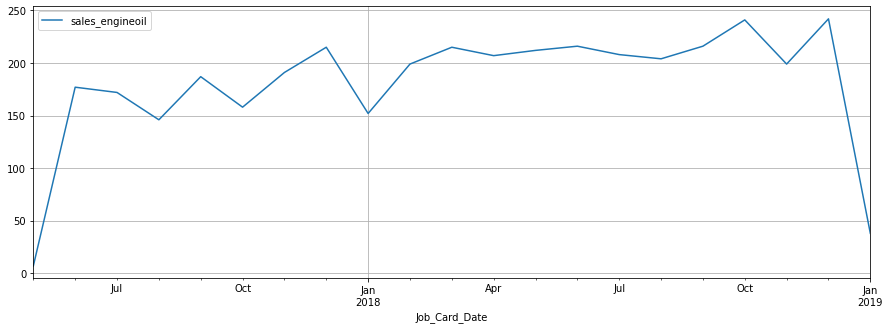

In [13]:
## visualization of newly created timeseries dataset

ts1.plot(figsize=(15,5),grid=True)
## there is little bit of upward trend  in monthly data.So we can do analysis on monthly data
## rather than daily data.
## There is some seasonality in data as in month of october we can expect increase in sale

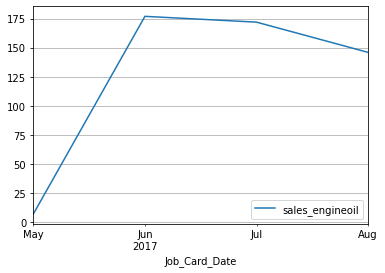

In [14]:
## plotting the visulas for 3 months
start_day='30-05-2017'
end_day='31-08-2017'
ts1[(start_day <= ts1.index) & (ts1.index <=end_day )].plot(grid=True)

In [15]:
## checking the stationarity of timeseries dataset
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(ts1['sales_engineoil'])

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(ts1['sales_engineoil'])

ADF Test Statistic : -4.858325517328468
p-value : 4.200848055450898e-05
#Lags Used : 0
Number of Observations Used : 20
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## AutoRegressive Model

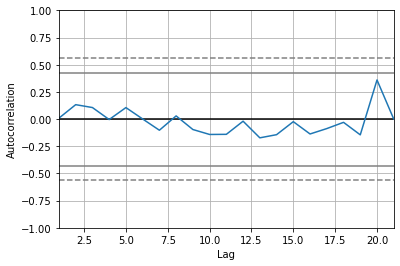

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts1['sales_engineoil'])
plt.show()

In [20]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


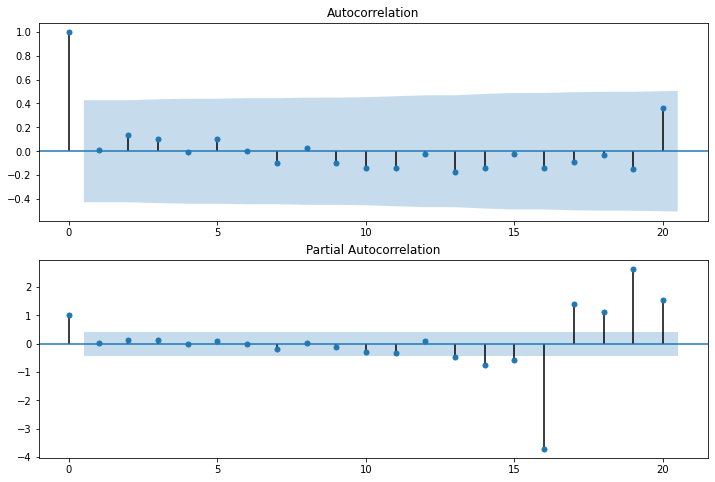

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(ts1['sales_engineoil'],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(ts1['sales_engineoil'],lags=20,ax=ax2)

In [25]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [26]:

model=ARIMA(ts1['sales_engineoil'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [27]:

model_fit.summary()

C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.sales_engineoil   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -109.910
Method:                       css-mle   S.D. of innovations             53.161
Date:                Tue, 09 Jun 2020   AIC                            227.820
Time:                        11:10:28   BIC                            231.803
Sample:                    06-30-2017   HQIC                           228.598
                         - 01-31-2019                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.2479      1.340      2.424      0.015       0.622       5.874
ar.L1.D.sales_engineoil    -0.5072      0.517     -0.981      0.327      -1.521       0.506
ma.L1.D.sales_engineoil    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9716           +0.0000j            1.9716            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
ts1.shape

(21, 1)

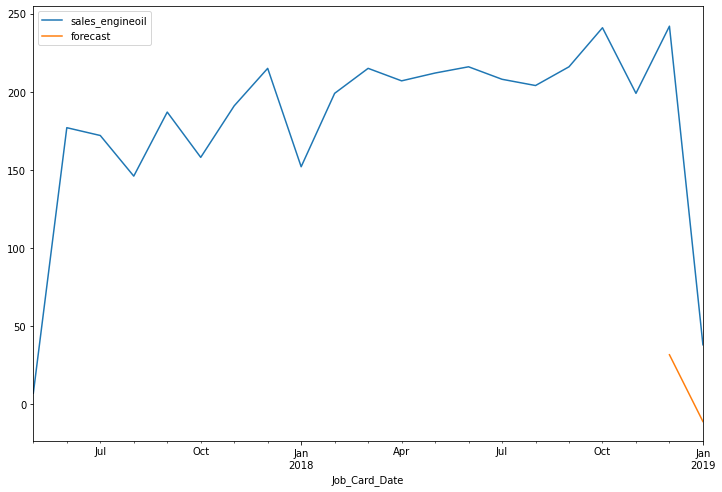

In [29]:
## forecasting on past data
ts1['forecast']=model_fit.predict(start=19,end=21,dynamic=True)
ts1[['sales_engineoil','forecast']].plot(figsize=(12,8))

In [30]:
import statsmodels.api as sm

In [31]:
model=sm.tsa.statespace.SARIMAX(ts1['sales_engineoil'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


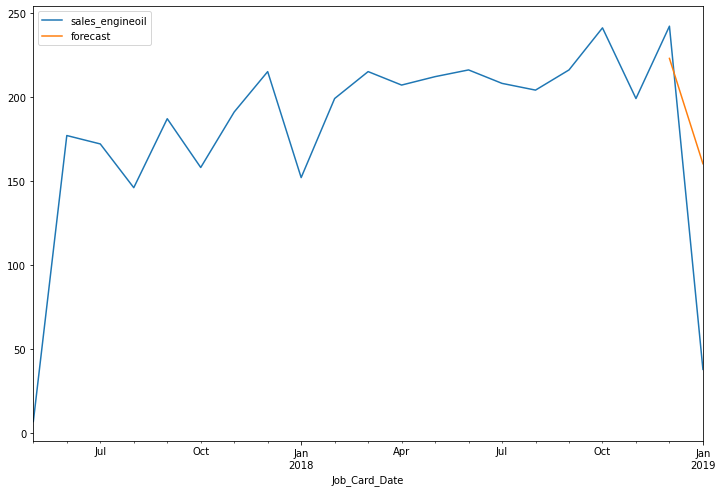

In [32]:
ts1['forecast']=results.predict(start=19,end=21,dynamic=True)
ts1[['sales_engineoil','forecast']].plot(figsize=(12,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[ts1.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [34]:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=ts1.columns)

In [35]:
future_datest_df.tail()

,sales_engineoil,forecast
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN
2019-12-31,NaN,NaN


In [36]:
future_df=pd.concat([ts1,future_datest_df])

In [37]:
ts1.shape

(21, 2)

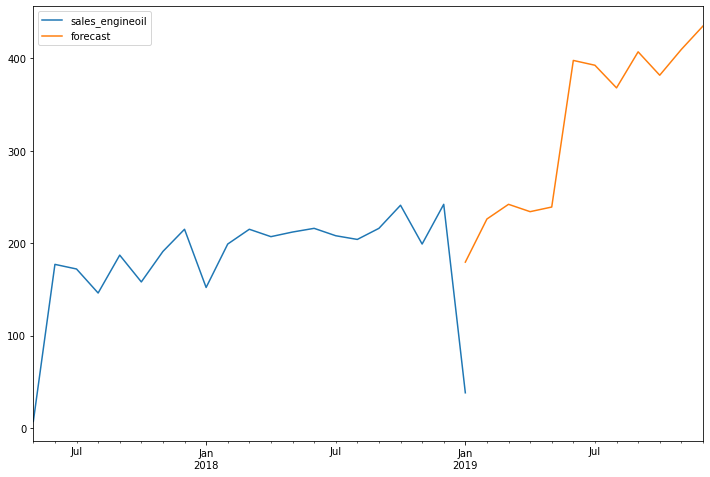

In [41]:
future_df['forecast'] = results.predict(start = 20, end = 33, dynamic= True)  
future_df[['sales_engineoil', 'forecast']].plot(figsize=(12, 8))